In [1]:
import pandas as pd

In [ ]:
winData = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv", index_col=0, parse_dates=True)

In [ ]:
winData

In [ ]:
winData["Year"] = winData.index.year
winData["Month"] = winData.index.month
winData["Day"] = winData.index.day

In [ ]:
winData

In [32]:
winData.loc["2006-01-01"] #melihat di tanggal tertentu

Consumption    1069.184
Wind                NaN
Solar               NaN
Wind+Solar          NaN
Year           2006.000
Month             1.000
Day               1.000
Name: 2006-01-01 00:00:00, dtype: float64

In [33]:
winData.loc["2016-01-05":"2017-12-27"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day
Date,,,,,,,
2016-01-05,1506.73700,206.468,12.549,219.017,2016,1,5
2016-01-06,1454.68500,156.044,12.595,168.639,2016,1,6
2016-01-07,1540.30400,313.603,14.638,328.241,2016,1,7
2016-01-08,1515.84000,460.876,40.969,501.845,2016,1,8
2016-01-09,1311.99600,205.629,23.891,229.520,2016,1,9
...,...,...,...,...,...,...,...
2017-12-23,1272.17085,748.074,8.450,756.524,2017,12,23
2017-12-24,1141.75730,812.422,9.949,822.371,2017,12,24
2017-12-25,1111.28338,587.810,15.765,603.575,2017,12,25


<AxesSubplot:xlabel='Date'>

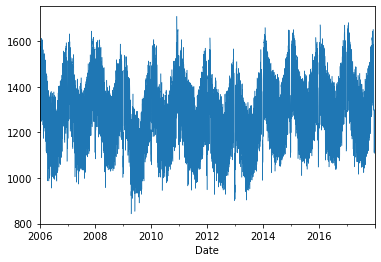

In [37]:
winData["Consumption"].plot(linewidth=0.5)

<AxesSubplot:xlabel='Date'>

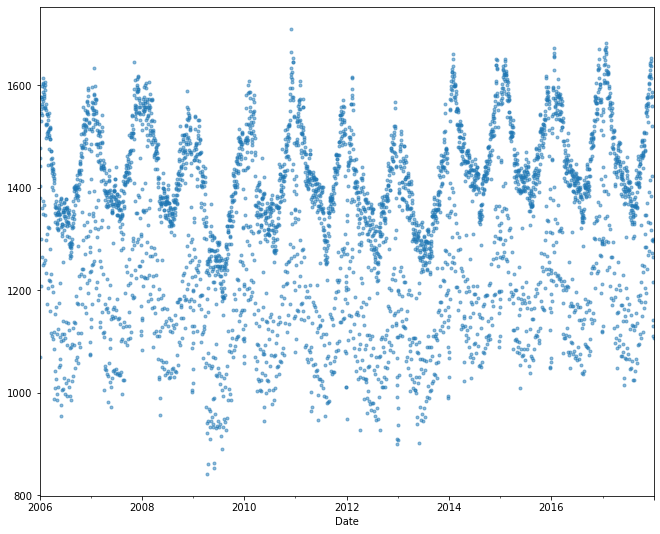

In [76]:
winData["Consumption"].plot(marker=".", alpha=0.5, linestyle="None", figsize=(11,9))

<AxesSubplot:xlabel='Date'>

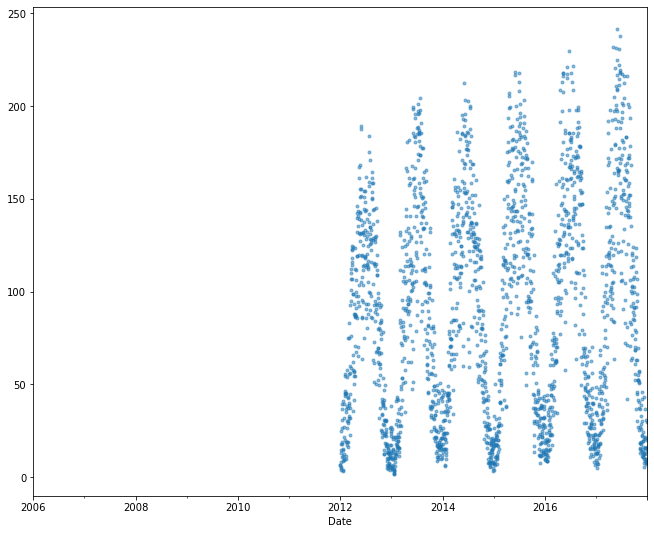

In [57]:
winData["Solar"].plot(marker=".", alpha=0.5, linestyle="None", figsize=(11,9))

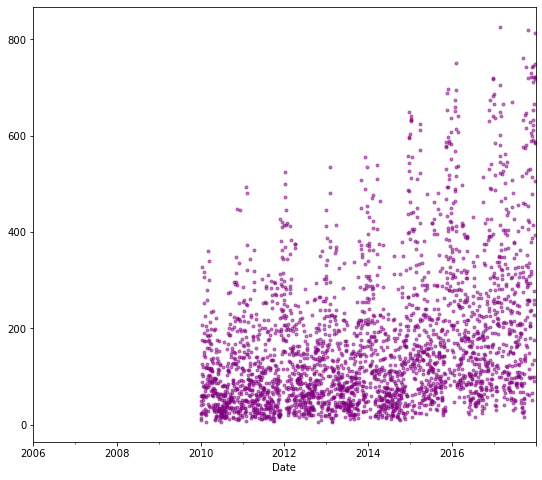

In [101]:
winData["Wind"].plot(marker=".", linestyle="None", color="purple", alpha=0.5, figsize=(9,8));

In [1]:
ax = winData.loc["2017", "Consumption"].plot(figsize=(11,7)) ax.set_ylabel("Daily Consumption (GWH)");

SyntaxError: invalid syntax (<ipython-input-1-c6c6f4190398>, line 1)

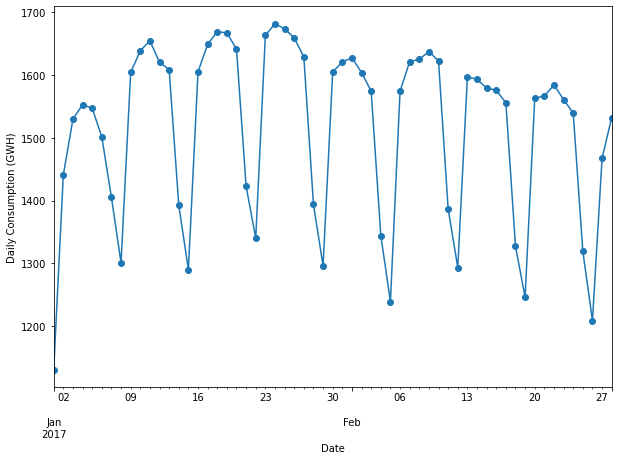

In [127]:
#melihat konsumsi listrik bulan januari dan februari

ax = winData.loc["2017-01":"2017-02", "Consumption"].plot(marker= "o", linestyle="-", figsize=(10,7))
ax.set_ylabel("Daily Consumption (GWH)");

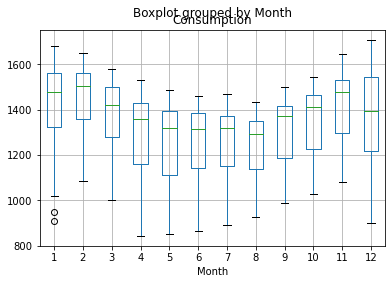

In [130]:
#box plots

winData.boxplot(column=["Consumption"], by="Month");

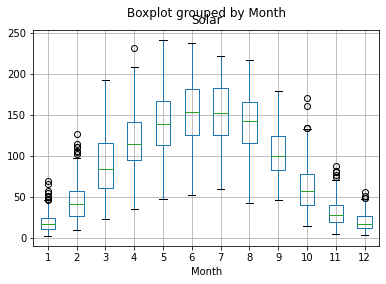

In [132]:
winData.boxplot(column=["Solar"], by="Month");

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

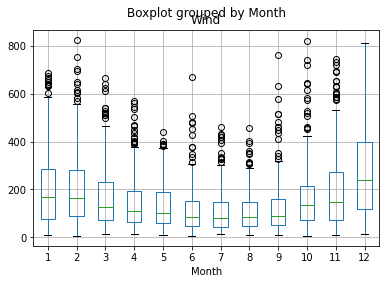

In [135]:
winData.boxplot(column=["Wind"], by="Month")

In [16]:
#resample data menjadi weekly mean time series

data_columns = ["Consumption", "Wind", "Solar", "Wind+Solar"]

In [32]:
windata_mean = winData[data_columns].resample("W").mean()
windata_mean.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571
2017-12-24,1440.342401,339.018429,9.895143,348.913571
2017-12-31,1203.265211,604.699143,19.240143,623.939286


In [19]:
print(winData.shape[0])

4383


In [20]:
print(windata_mean.shape[0])

627


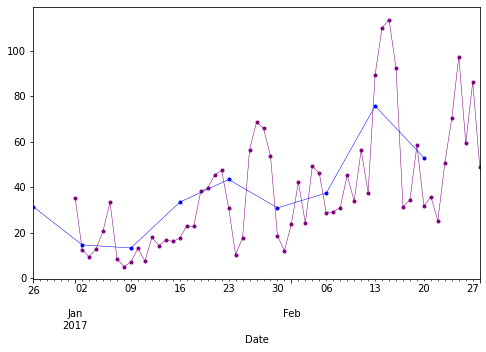

In [42]:
# gambarkan rangkaian waktu solar harian dan mingguan dalam satu periode enam bulan utk membandingkannya

start, end = "2017-01", "2017-02"

winData.loc[start:end, "Solar"].plot(marker=".", figsize=(8,5), linestyle="-", linewidth=0.5, color="purple")
windata_mean.loc[start:end, "Solar"].plot(marker=".", figsize=(8,5), linestyle="-", linewidth=0.5, color="blue");